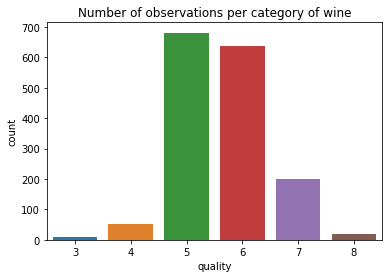

# of instances: 1599
[[ 7.4   0.7   0.    1.9   0.08 11.   34.    1.    3.51  0.56  9.4   5.  ]
 [ 7.8   0.88  0.    2.6   0.1  25.   67.    1.    3.2   0.68  9.8   5.  ]
 [ 7.8   0.76  0.04  2.3   0.09 15.   54.    1.    3.26  0.65  9.8   5.  ]
 [11.2   0.28  0.56  1.9   0.07 17.   60.    1.    3.16  0.58  9.8   6.  ]
 [ 7.4   0.7   0.    1.9   0.08 11.   34.    1.    3.51  0.56  9.4   5.  ]]
[[ 6.2   0.6   0.08  2.    0.09 32.   44.    0.99  3.45  0.58 10.5   5.  ]
 [ 5.9   0.55  0.1   2.2   0.06 39.   51.    1.    3.52  0.76 11.2   6.  ]
 [ 6.3   0.51  0.13  2.3   0.08 29.   40.    1.    3.42  0.75 11.    6.  ]
 [ 5.9   0.65  0.12  2.    0.07 32.   44.    1.    3.57  0.71 10.2   5.  ]
 [ 6.    0.31  0.47  3.6   0.07 18.   42.    1.    3.39  0.66 11.    6.  ]]
1279
320
0 tensor(0.7418)
500 tensor(0.3108)
1000 tensor(0.2892)
1500 tensor(0.2832)
2000 tensor(0.2806)
2500 tensor(0.2789)
3000 tensor(0.2776)
3500 tensor(0.2765)
4000 tensor(0.2756)
4500 tensor(0.2747)
5000 tensor(0.2739)
55

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:150: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Training accuracy 0.6059421422986708
prediction accuracy 0.6


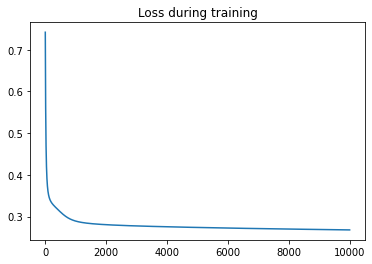

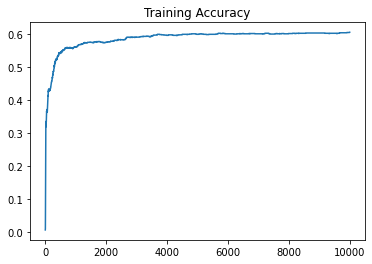

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,   9,   4,   0,   0],
       [  0,   0, 107,  31,   2,   0],
       [  0,   0,  50,  80,   4,   0],
       [  0,   0,   3,  22,   5,   0],
       [  0,   0,   0,   1,   1,   0]])

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from torch.autograd import Variable
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, scale

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
np.random.seed(1)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

data = pd.read_csv('winequality-red.csv')
data.head()
data["quality"].unique()
sns.countplot(x = "quality", data = data)
plt.title("Number of observations per category of wine")
plt.show()
wine = np.loadtxt("winequality-red.csv", delimiter= ",", skiprows= 1)

# These options determine the way floating point numbers, arrays and other NumPy objects are displayed.

# Number of digits of precision for floating point output
np.set_printoptions(precision = 2)

# If True, always print floating point numbers using fixed point notation, 
# in which case numbers equal to zero in the current precision will print as zero.
np.set_printoptions(suppress = True)

print("# of instances:", len(wine))

# print the first five rows
print(wine[:5])

# print the last five rows
print(wine[-5:])
test_per = 0.2

# number of input features
n_features = 11

# X is all the rows in the dataset and the first 11 columns, ie the 11 input features
X = wine[:,:n_features]

# Standardize the input features
X = scale(X)

# Now we have X - a scaled dataset with all the features

# label is all the rows but only from the 11th column. 
# Ie this is just the target values
label = wine[:, n_features:]

# Encode categorical features as a one-hot numeric array.
oneHot = OneHotEncoder()

# Fit OneHotEncoder to X, then transform X. Then to an array
label = oneHot.fit_transform(label).toarray()
X_train , X_test , Y_train , Y_test = train_test_split(X , label, test_size = test_per)

# check the lengths of the data 
print(len(X_train))
print(len(X_test))
from IPython.display import Image
Image("/kaggle/input/fcnimage/FCN model.JPG")
 
class FCN(nn.Module):
    def __init__(self):
        super(FCN , self).__init__()
        
        # Input to 11 features (n_features defined as 11 above) to 11 hidden nodes. 
        self.layer1 = nn.Linear(n_features , n_features)
        
        # 11 hidden nodes to 6 output classes.
        self.layer2 = nn.Linear(n_features , 6)  # 6 output classes
        
        # Forward pass
    def forward(self , data):
        
        # apply layer one to input 
        activation1 = self.layer1(data)
        
        # sigmoid activation on the first layer
        activation1 = torch.sigmoid(activation1)
        
        # layer two 
        activation2 = self.layer2(activation1)
        
        # return the output activation on the sigmoid
        return torch.sigmoid(activation2)
# define the model instance
model = FCN()

# define the criterion 
# Creates a criterion that measures the Binary Cross Entropy between the target and the output
criterion = nn.BCELoss()

# gradient decent
optimizer = optim.SGD(model.parameters() , lr = 0.2)

# convert the numpy to tensor
# variable wraps a tensor
X = Variable(torch.from_numpy(X_train).float())
Y = Variable(torch.from_numpy(Y_train).float())

# set n to 0
# create an empty array to hold the losses, actual class, predicted class and training accuracy.
n = 0
losses = []
act_class = []
pred_class = []
train_acc = []

# iterate the data 10,000 times
for epoch in range(10000):
    
    # forward pass
    out = model(X)
    loss = criterion(out , Y)
    losses.append(loss.data)
    
    optimizer.zero_grad()
    
    # back propagation
    loss.backward()
    optimizer.step()
    
    # save the training accuracy to the train_acc array
    train_acc.append(accuracy_score(oneHot.inverse_transform(Y), oneHot.inverse_transform(model(X).data.numpy())))
    
    if epoch % 500 == 0:
        print(epoch, loss.data)
        

# Training Over.

# add the losses to the losses array
losses = np.array(losses , dtype = np.float)

# Convert the data back to the original representation.
train_out = oneHot.inverse_transform(model(X).data.numpy())

print('Training accuracy', accuracy_score(oneHot.inverse_transform(Y), train_out))

test_out=oneHot.inverse_transform(model(torch.from_numpy(X_test).float()).data.numpy())

print('prediction accuracy', accuracy_score(oneHot.inverse_transform(Y_test), test_out))

# gather class results
act_class.append(oneHot.inverse_transform(Y_test))
pred_class.append(test_out)

%matplotlib inline
plt.plot(losses)
plt.title("Loss during training")
plt.show()

plt.plot(train_acc)
plt.title("Training Accuracy")
plt.show()

confusion_matrix(oneHot.inverse_transform(Y_test), test_out)